"Uvod u znanost o podacima" <br>
Fakultet Elektrotehnike i Računarstva <br>
2023/2024

<center><h1>Early-Stage Alzheimer's Disease Prediction Using Machine Learning Models<h1><center>

<b><font size="4">Učitavanje potrebnih biblioteka i skupa podataka</font></b>

In [237]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [256]:
input_dataset = pd.read_csv("oasis_longitudinal.csv", sep=",")

<h2>Pregled skupa podataka i rukovanje podatcima<h2>

<font size="3.5">Skup podataka sadrži 373 zapisa magnetskih rezoranci koje pripadaju 150 subjekata. Jedna magnetska rezonanca
sadrži atribute koje želimo dokazati da utječu na demenciju te time predvidjeti demenciju neviđenih magnetskih rezonanci.</font>

In [257]:
input_dataset.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [258]:
print(f"Ukupan broj jedinka u datasetu i broj značajki: {input_dataset.shape}")
print(f"Imena značajki: {' '.join(list(input_dataset.columns))}")

Ukupan broj jedinka u datasetu i broj značajki: (373, 15)
Imena značajki: Subject ID MRI ID Group Visit MR Delay M/F Hand Age EDUC SES MMSE CDR eTIV nWBV ASF


Radi boljeg razumjevanje značenja značajki i njihovih domena, napisani su puni nazivi svake značajke.<br>
+ SUBJECT ID 
+ MRI ID 
+ GROUP = OZNAKA  
+ VISIT = BROJ POSJETA
+ MR DELAY = ODGODA MR-A
* M/F = MUŠKI ŽENSKI SPOL 
+ HAND = DOMINANTNA RUKA
+ AGE = STAROST
+ EDUC = TRAJANJE OBRAZOVANJA
+ SES = SOCIO EKONOMSKI STATUS
+ MMSE = PROCJENA MENTALNOG STANJA 
+ CDR = CLINICAL DEMENTIA RATING
+ ETIV = PROCIJENJENI INTRAKRANIJALNI VOLUMEN
+ NWBV = NORMALIZIRANI VOLUMEN MOZGA 
+ ASF = SKALIRANI FAKTOR ATLAS


In [259]:
input_dataset.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [260]:
input_dataset.nunique()

Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
M/F             2
Hand            1
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          286
nWBV          136
ASF           265
dtype: int64

In [261]:
print(input_dataset["Group"].unique())

['Nondemented' 'Demented' 'Converted']


Vrlo je zbunjujuće što postoje dva izraza za demenciju, pa ću promijeniti instance s vrijednostima 'Converted' u 'Demented

In [262]:
input_dataset["Group"] = input_dataset["Group"].replace("Converted", "Demented")

In [263]:
nondemented_count = input_dataset[input_dataset["Group"]=="Demented"].shape[0]
demented_count = input_dataset[input_dataset["Group"]=="Nondemented"].shape[0]

print(f'Total Nondemented values: {nondemented_count}')
print(f'Total Demented values: {demented_count}')

Total Nondemented values: 183
Total Demented values: 190


Također vidimo da postoji samo jedna vrijednost za značajku "Hand" te je također mogu ispustiti. 

In [264]:
input_dataset.drop(("Hand"), axis=1, inplace=True)

Značajka "MRI ID" je monotoni atribut te je možemo odbaciti. Također bih i "Subject ID", "Visit" te "MRI Delay" jer ne daju informacije
o vrijednosti labele.

In [265]:
input_dataset.drop(["Subject ID", "MRI ID", "Visit", "MR Delay"], axis=1, inplace=True)

<font size="3"><b>Deskriptivna statistika</b></font>

In [266]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(input_dataset['CDR'], input_dataset['Group'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Ima značajne korelacije")
else:
    print("Nema značajne korelacije.")

Chi-squared value: 299.3954205565829
P-value: 1.3446723781716832e-64
Ima značajne korelacije


Na temelju chi-kvadrat testa vidljivo je da postoji velika korelacija između "CDR" (CLINICAL DEMENTIA) i labele "Group"
koja nam govori je li pacijent dementat ili nije. Za sada ću ostaviti labelu CDR ali je kasnije mogu ispustiti ako 
će tako biti smislenije (pretpostavka je da želimo predvidjeti rezultat demencije na temelju MRI, no ako imamo
CDR već nam je jasan rezultat).
</br>
EDIT:</BR>
U istraživanju je CDR je odbačen pa će i ovdje biti odbačen.

Plava boja = Nema demencije, Crvena boja = demencija


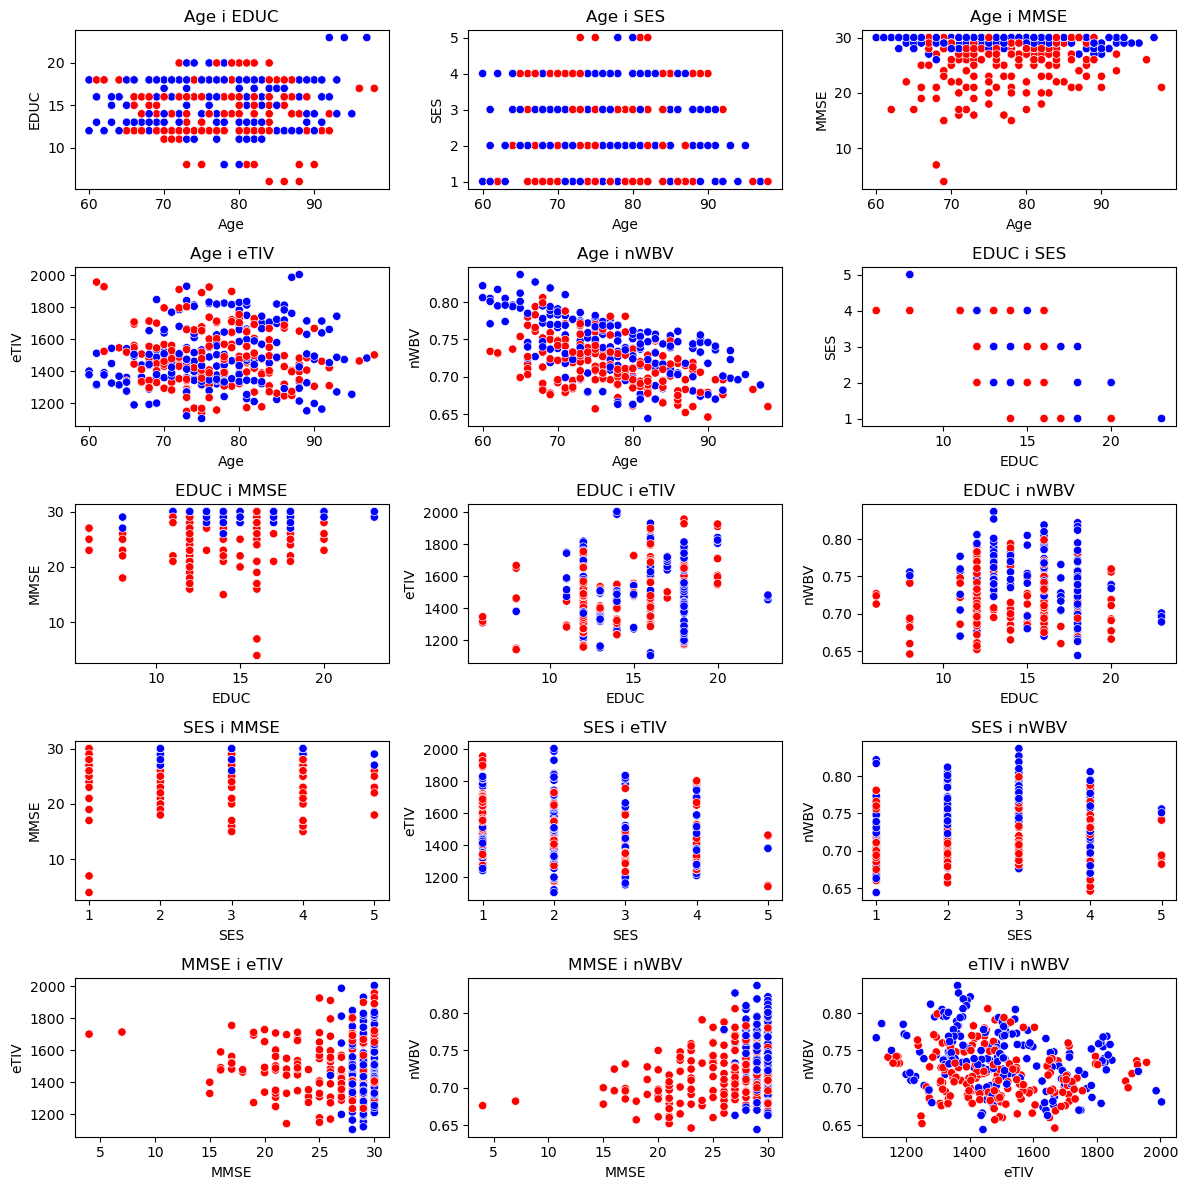

In [267]:
from itertools import combinations
print("Plava boja = Nema demencije, Crvena boja = demencija")
feature_combinations = list(combinations(['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'Group'][:-1], 2))

fig, axes = plt.subplots(5, 3, figsize=(12, 12))


for i, combination in enumerate(feature_combinations):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    if i < len(feature_combinations):
        sns.scatterplot(data=input_dataset, x=combination[0], y=combination[1], hue="Group", palette={"Demented": "red", "Nondemented": "blue"}, ax=ax)
        ax.set_title(f"{combination[0]} i {combination[1]}")
        ax.legend().set_visible(False)
    else:
        fig.delaxes(ax)

plt.tight_layout()


Scatter plot grafovi pokazuju da u svim grafovima koji sadrže procjenu mentalnog stanja pacijenti sa slabijom procjenom teže prema demenciji.

<AxesSubplot:>

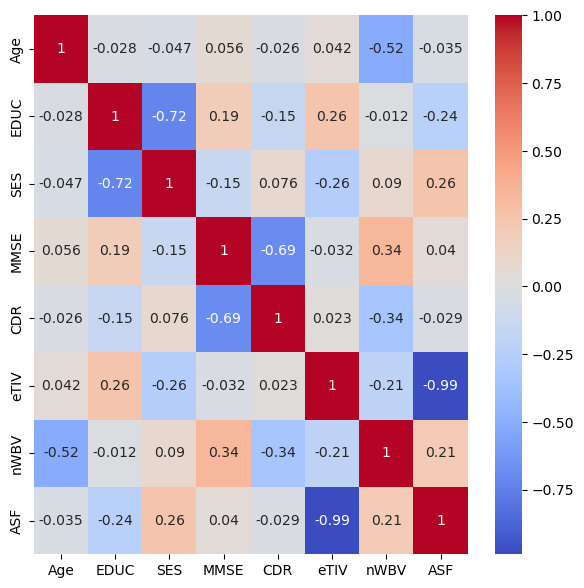

In [268]:
correlation_matrix = input_dataset.corr()
plt.figure(figsize=(7, 7))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

U korelacijskoj matrici vidljivo je kako su eTIV i ASF obrnuto proporcionalno. Njihov odnos je definiran ovako: "Automated atlas transformation generated the Atlas Scaling Factor (ASF) defined as the volume-scaling factor required to match each individual to the atlas target. Because atlas normalization equates head size, the ASF should be proportional to TIV." (https://pubmed.ncbi.nlm.nih.gov/15488422/). Ovime je jasno da je ASF značajka redundantna jer samo skalira značajku eTIV te se može samo ispustiti.

In [269]:
input_dataset.drop(("ASF"), axis=1, inplace=True)

Također je vidljivo kako su socio-ekonomski status i godine edukacije vrlo korelirane značajke. To će možda kasnije
biti bitno kod kalkulacije nedostajalih vrijednosti.

<font size="3"><b>Odnos starosti i demencije</b></font>

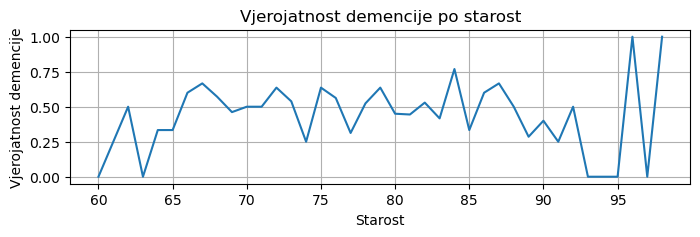

In [270]:
age_probabilities = (
    input_dataset.groupby("Age")["Group"]
    .apply(lambda x: (x == "Demented").sum() / len(x))
    .reset_index(name='Probability')
)

plt.figure(figsize=(8,2))
plt.plot(age_probabilities["Age"], age_probabilities["Probability"])
plt.xlabel("Starost")
plt.ylabel("Vjerojatnost demencije")
plt.title("Vjerojatnost demencije po starost")
plt.grid(True)


Na temelju linijskog grafa, nije jasno vidljiva izražena povezanost između demencije i starosti. To bi moglo biti zbog toga što su ispitanici obuhvaćeni starosnim rasponom od 60 do 96 godina, što znači da bi demencija mogla započeti čak i u "ranijim godinama" skupa.

<font size="3"><b>Odnos spola i demencije</b></font>

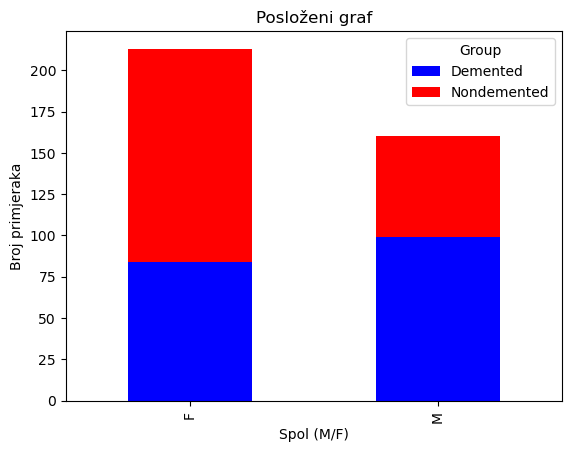

In [271]:

input_dataset["Group"] = input_dataset["Group"].astype("category")

group_counts = input_dataset.groupby(["M/F", "Group"]).size().unstack().fillna(0)


group_counts.plot(kind="bar", stacked=True, color=["blue", "red"])


plt.xlabel("Spol (M/F)")
plt.ylabel("Broj primjeraka")
plt.title("Posloženi graf")
plt.legend(title="Group", loc="upper right")



Graf pokazuje da, iako ima manje muških ispitanika, broj dementnih muškaraca veći je od broja dementnih žena.

Text(0.5, 1.0, 'Prosječna količina mozga po broju godina obrazovanja')

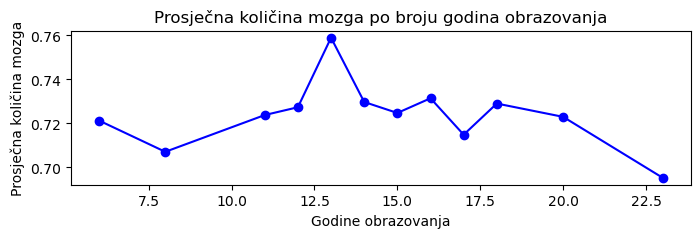

In [272]:
educ_nwbv_mean = input_dataset.groupby("EDUC")["nWBV"].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(8, 2))
plt.plot(educ_nwbv_mean["EDUC"], educ_nwbv_mean["nWBV"], marker="o", color="blue", linestyle="-")

# Adding labels and title
plt.xlabel("Godine obrazovanja")
plt.ylabel("Prosječna količina mozga")
plt.title("Prosječna količina mozga po broju godina obrazovanja")

Na temelju grafa vidljivo je da postoji optimalna količina obrazovanja te da više od toga smanjuje mozak (u ovom skupu podataka).

<font size="3"><b>Deskripcija godina</b></font>

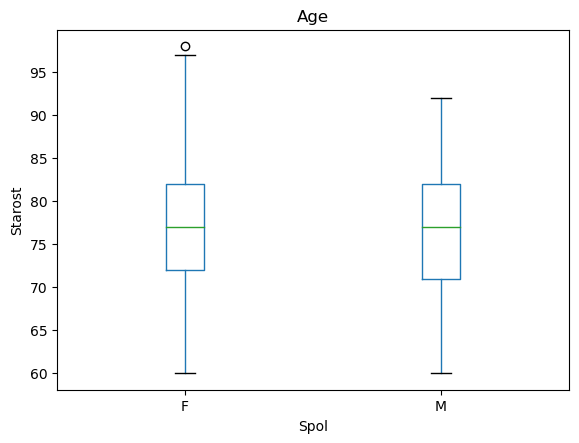

In [273]:
input_dataset.boxplot(column="Age", by="M/F", grid=False)
plt.xlabel("Spol")
plt.ylabel("Starost")
plt.suptitle('')  # To remove the default title created by pandas
plt.show()

<font size="4"><b>Stršeće vrijednosti</b></font>

Prikaz podataka sa kontinuiranim vrijednostima i micanje stršećih vrijednosti.

In [274]:
cleaned_dataset = input_dataset.copy()
for column in ["Age", "eTIV", "nWBV"]:
    Q1, Q3 = input_dataset[column].quantile(0.25), input_dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_condition, upper_condition = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    cleaned_dataset = cleaned_dataset[(cleaned_dataset[column] > lower_condition) & (cleaned_dataset[column] < upper_condition)]

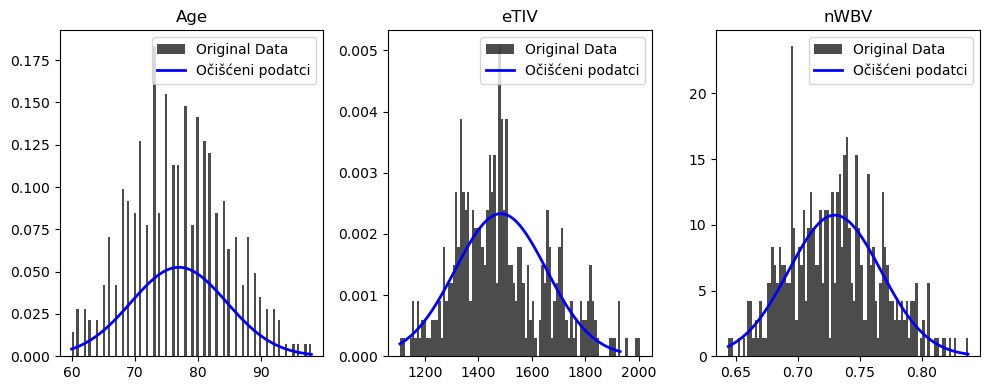

Age
stat=0.993, p=0.071, 
Vjerojatno Gausova distribucija
eTIV
stat=0.977, p=0.000, 
Vjerojanto nije Gausova distribucija
nWBV
stat=0.992, p=0.035, 
Vjerojatno Gausova distribucija


In [275]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import shapiro

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
axes = axes.flatten()
i = 0

for column in input_dataset.columns:
    if input_dataset[column].nunique() > 20 and column not in ["Subject ID", "MRI ID", "MR Delay"]:
        
        axes[i].hist(input_dataset[column], bins=100, color="black", alpha=0.7, density=True, label="Original Data")

        x = np.linspace(cleaned_dataset[column].min(), cleaned_dataset[column].max(), 100)
        p = norm.pdf(x, cleaned_dataset[column].mean(), cleaned_dataset[column].std())
        axes[i].plot(x, p, "blue", linewidth=2, label="Očišćeni podatci")

        axes[i].set_title(f"{column}")
        axes[i].legend() 
        i += 1

plt.tight_layout()
plt.show()
input_dataset = cleaned_dataset

for column in cleaned_dataset.columns:
    if cleaned_dataset[column].nunique() > 20 and column not in ["Subject ID", "MRI ID", "MR Delay"]:
        stat, p = shapiro(cleaned_dataset[column])
        print(column)
        print("stat=%.3f, p=%.3f, " % (stat, p))
        if p >= 0.030:
            print("Vjerojatno Gausova distribucija")
        else:
            print("Vjerojanto nije Gausova distribucija")



<font size="4"><b>Nedostajući podatci</b></font>

,Broj nepostojećih vrijednosti
SES,19
MMSE,2


Text(0.5, 1.0, 'Postotci nepostojećih vrijednosti')

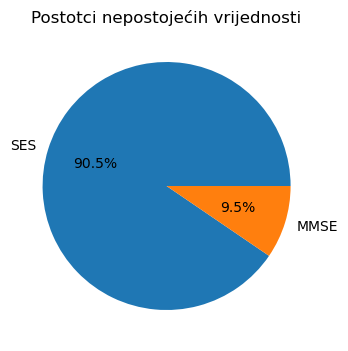

In [276]:
nan_dic = {}

for column in input_dataset.columns:
    if input_dataset[column].isna().sum()>0:
        nan_dic[column] = input_dataset[column].isna().sum()

display(pd.DataFrame.from_dict(nan_dic, orient="index", columns=["Broj nepostojećih vrijednosti"]))        
        
plt.figure(figsize=(4,6))

plt.pie(nan_dic.values(), labels=nan_dic.keys(),autopct="%1.1f%%" )
plt.title("Postotci nepostojećih vrijednosti")



<font color='red'>Imputacija SES<font>

Budući da su "SES" i "EDUC" značajke vrlo negativno korelirane, pacijenti sa više godina obrazovanja biti će bliže
vrhu socio-ekonomskog statusa (1 je najviša klasa), vrijednost značajke "SES" ćemo izračunati na temelju vrijednosti "EDUC" primjera.

In [277]:
def imputation_fun(row):
    bins = [6, 10, 13, 16, 20, 23]
    labels = [5, 4, 3, 2, 1]
    if pd.isna(row["SES"]):
        imputed_value = labels[np.digitize(row["EDUC"], bins=bins, right=True)]
        print(f"Education {row['EDUC']} == SES {imputed_value}")
        row["SES"] = imputed_value
    
    return row

input_dataset = input_dataset.apply(imputation_fun, axis=1)

Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3
Education 16 == SES 2
Education 16 == SES 2
Education 16 == SES 2
Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3
Education 12 == SES 3


<font color='red'>Odbacivanje MMSE<font>

Kako samo dvaju primjerka nedostaje vrijednost "MMSE" odbaciti cemo ta dva primjerka

In [278]:
input_dataset.dropna(subset=["MMSE"], inplace=True)

In [279]:
print("Broj nedostajućih vrijednosti")
print(input_dataset.isnull().sum())

Broj nedostajućih vrijednosti
Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
dtype: int64


<font size="4"><b>Normalizacija</b></font>

In [280]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ["Age", "EDUC", "MMSE", "eTIV", "nWBV"]

input_dataset[columns_to_scale] = scaler.fit_transform(input_dataset[columns_to_scale])

<font size="4"><b>Enkodacija</b></font>

In [281]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in ["Group", "M/F", "SES"]:
    input_dataset[column] = label_encoder.fit_transform(input_dataset[column])

<font size="4"><b>Konačan skup podataka</b></font>

In [282]:
print(input_dataset.head(10))

    Group  M/F       Age      EDUC  SES      MMSE  CDR      eTIV      nWBV
2       0    1 -0.263983 -0.904924    2 -1.173763  0.5  1.132416  0.168367
3       0    1 -0.132349 -0.904924    2  0.181996  0.5  1.486036 -0.449879
4       0    1  0.394186 -0.904924    2 -1.444915  0.5  1.250290 -0.772442
5       1    0  1.447256  1.178571    2  0.181996  0.0 -1.596350 -0.530519
6       1    0  1.710523  1.178571    2 -0.089156  0.0 -1.684755 -0.315478
7       1    1  0.394186 -0.904924    3  0.181996  0.0  1.197247 -0.476759
8       1    1  0.789087 -0.904924    3  0.453148  0.5  1.267971 -0.503639
9       1    1  1.052354 -0.904924    3  0.724300  0.0  1.256183 -0.664921
10      0    1 -0.790518  0.484073    1  0.181996  0.5 -0.759450  0.490929
11      0    1 -0.527250  0.484073    1 -0.089156  1.0 -0.712301 -0.073555


<h2>Replikacija rezultata</h2>

In [283]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


<font size="4"><b>Separacija podataka</b></font>

In [284]:
from sklearn.model_selection import cross_validate, train_test_split

Podjela na skupa podataka na skup primjera i na skup pripadnih oznaka.

In [285]:
y_column = 'Group'  
y = pd.DataFrame(input_dataset[y_column], columns=[y_column])
X = input_dataset.drop(columns=[y_column])  # Features (X)
display(X.head(10))
display(y.head(10))

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
2,1,-0.263983,-0.904924,2,-1.173763,0.5,1.132416,0.168367
3,1,-0.132349,-0.904924,2,0.181996,0.5,1.486036,-0.449879
4,1,0.394186,-0.904924,2,-1.444915,0.5,1.250290,-0.772442
5,0,1.447256,1.178571,2,0.181996,0.0,-1.596350,-0.530519
6,0,1.710523,1.178571,2,-0.089156,0.0,-1.684755,-0.315478
7,1,0.394186,-0.904924,3,0.181996,0.0,1.197247,-0.476759
8,1,0.789087,-0.904924,3,0.453148,0.5,1.267971,-0.503639
9,1,1.052354,-0.904924,3,0.724300,0.0,1.256183,-0.664921
10,1,-0.790518,0.484073,1,0.181996,0.5,-0.759450,0.490929
11,1,-0.527250,0.484073,1,-0.089156,1.0,-0.712301,-0.073555


,Group
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,1
10,0
11,0


Radi testiranja preciznosti i točnosti sposobnosti modela dijelimo na trening i test skup. Trening skup će nam
model naučiti točno predvidjeti oznake primjera a test skup će provjeriti koliko je model uspješno naučen.

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<font size="4"><b>Treniranje modela</b></font>

Kako je ishod testiranja pacijenata pozitivno ili negativno na Alzheimera, morati ću odabrati samo klasifikacijske modele. Takvi modeli prepisuje primjeru jednu oznaku u diskriminantnom skupu na temelju vrijednosti značajka u primjeru. 

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

models = {"LogisticRegression": LogisticRegression(), "SVM": SVC(), "XGBOOST": XGBClassifier(), "DecisionTree": DecisionTreeClassifier(), "RandomForest": RandomForestClassifier()}
for model in models.values():
    print(model)

LogisticRegression()
SVC()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
DecisionTreeClassifier()
RandomForestClassifier()


<b>Određivanje najboljih parametara i cross validacija</b>


Validacije je proces "uštimavanja" parametara koji se ne optimiziraju u procesu učenja modela, odnosno hiperparametara, bez korištenja podataka iz skupa za testiranje. Tako se izbjegava curenja informacija iz testnog skupa u skup za učenje prilikom korištenja unakrsne provjere. U ovom radu se koristi ten-fold cross validation (unakrsna validacija): skup za učenje se dijeli na deset podskupova i u svakoj iteraciji se testira na izdvojenom podskupu a trenira na ostalih devet podskupova. Jednom kada se deset iteracije odrade uzima se srednja vrijednost rezultata deset podskupova.
</br></br>
GridSearch algoritam se koristi za "uštimavanje" spomenutih hiperparameta na način da radi mrežu svih kombinacija mogućih hiperparameta i onda uzima najbolju kombinaciju (ili samo jedan) hiperparametar na temelju rezultata predviđenih primjera. 
</br></br>
Na svu sreću, GridSearch algoritam interno implementira postupak ten-fold unakrskne validacije. Time se funkcijom grid_search može trenirati i validirati model. 


In [ ]:
from sklearn.model_selection import GridSearchCV

In [300]:
svm_param_grid = {'C': [0.1, 1, 2, 3, 10, 15, 100], 'gamma': [0.7, 0.5, 0.1, 0.01], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(models["SVM"], svm_param_grid, cv=10)
grid_search.fit(X_train, y_train)
svm_best_params = grid_search.best_params_
svm_best_score = grid_search.best_score_


logreg_param_grid = {"C": [0.1, 1, 2, 3, 10, 15, 100]}
grid_search = GridSearchCV(models["LogisticRegression"], logreg_param_grid, cv=10)
grid_search.fit(X_train, y_train)
logreg_best_params = grid_search.best_params_
logreg_best_score = grid_search.best_score_

decision_tree_param_grid = {'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(models["DecisionTree"], decision_tree_param_grid, cv=10)
grid_search.fit(X_train, y_train)
decision_tree_best_params = grid_search.best_params_
decision_tree_best_score = grid_search.best_score_

xgboost_param_grid = {'learning_rate': [0.5, 0.1, 0.01, 0.001], 'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5, 10, 15]}
grid_search = GridSearchCV(models["XGBOOST"], xgboost_param_grid, cv=10)
grid_search.fit(X_train, y_train)
xgboost_best_params = grid_search.best_params_
xgboost_best_score = grid_search.best_score_

randomforest_param_grid = {'n_estimators': [50, 100, 150],'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(models["RandomForest"], randomforest_param_grid, cv=10)
grid_search.fit(X_train, y_train)
randomforest_best_params = grid_search.best_params_
randomforest_best_score = grid_search.best_score_

TypeError: list indices must be integers or slices, not str

Optimalni hiperparametri

In [290]:
print(svm_best_params)
print(logreg_best_params)
print(decision_tree_best_params)
print(xgboost_best_params)
print(randomforest_best_params)

{'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}
{'C': 1}
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


<b>Treniranje s optimalnim hiperparametrima</b>

In [291]:
logreg_clf = LogisticRegression(**logreg_best_params).fit(X_train, y_train)
svm_clf = SVC(**svm_best_params).fit(X_train, y_train)
randomforest_clf =  RandomForestClassifier(**randomforest_best_params).fit(X_train, y_train)
xgboost_clf = XGBClassifier(**xgboost_best_params).fit(X_train, y_train)
decisiontree_clf = DecisionTreeClassifier(**decision_tree_best_params).fit(X_train, y_train)

/Users/josiphanak/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josiphanak/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/87/tv2hscb924j990wvfx_1m2300000gn/T/ipykernel_83429/3678981148.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest_clf =  RandomForestClassifier(**randomforest_best_params).fit(X_train, y_train)


<font size="4"><b>Testiranje</b></font>

<b>Metrike</b>

In [292]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, fbeta_score, precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

<b>Logistička Regresija</b>

Accuracy: 0.918918918918919
F1 Score: 0.9318181818181819
F-beta Score: 0.9715639810426541
Precision: 0.8723404255319149
Confusion Matrix: 
[[27  6]
 [ 0 41]]
ROC AUC: 0.9090909090909091


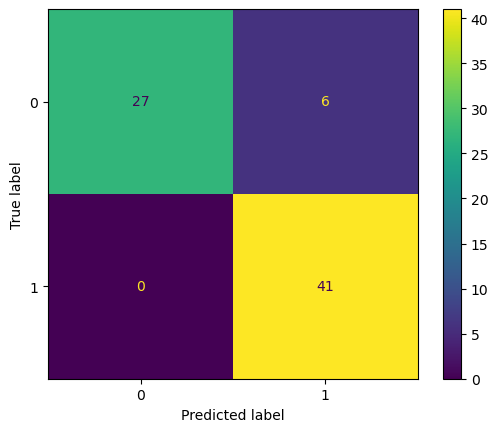

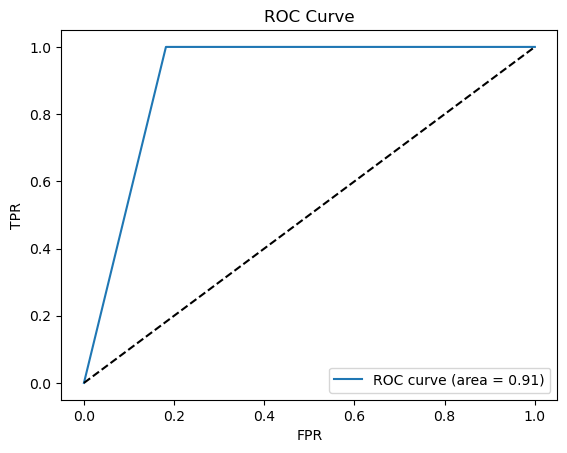

In [293]:

y_pred = logreg_clf.predict(X_test)
y_true = y_test  

logreg_acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {logreg_acc}")


logreg_f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {logreg_f1}")


logreg_fbeta = fbeta_score(y_true, y_pred, beta=2)
print(f"F-beta Score: {logreg_fbeta}")


logreg_precision = precision_score(y_true, y_pred)
print(f"Precision: {logreg_precision}")

conf_matrix = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()


fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

<b>SVM</b>

Accuracy: 0.8783783783783784
F1 Score: 0.8965517241379309
F-beta Score: 0.9285714285714285
Precision: 0.8478260869565217
Confusion Matrix: 
[[26  7]
 [ 2 39]]
ROC AUC: 0.8695491500369548


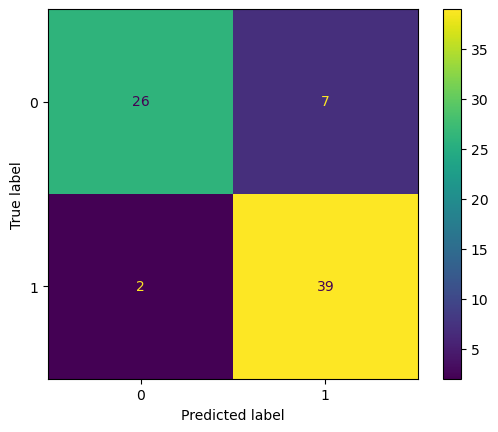

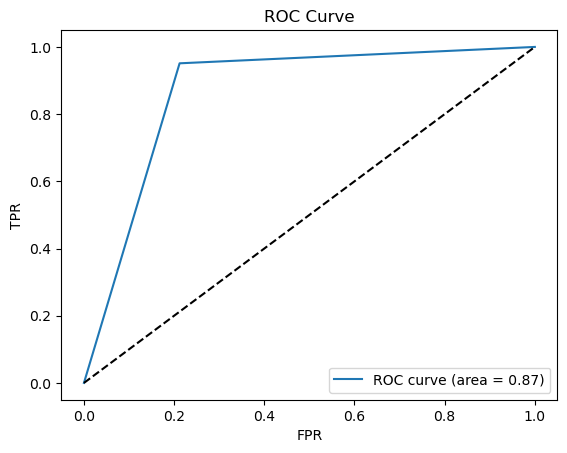

In [294]:
y_pred = svm_clf.predict(X_test)
y_true = y_test

svm_acc = accuracy_score(y_true, y_pred)
print(f'Accuracy: {svm_acc}')


svm_f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {svm_f1}')


svm_fbeta = fbeta_score(y_true, y_pred, beta=2)
print(f'F-beta Score: {svm_fbeta}')

svm_precision = precision_score(y_true, y_pred)
print(f"Precision: {svm_precision}")

conf_matrix = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()


fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

<b>Random Forest</b>

Accuracy: 0.9054054054054054
F1 Score: 0.9213483146067416
F-beta Score: 0.9669811320754718
Precision: 0.8541666666666666
Confusion Matrix: 
[[26  7]
 [ 0 41]]
ROC AUC: 0.8939393939393939


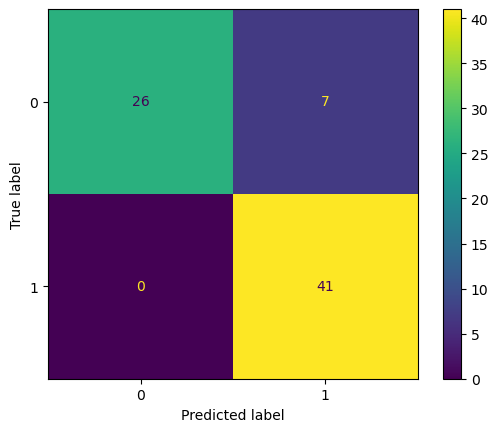

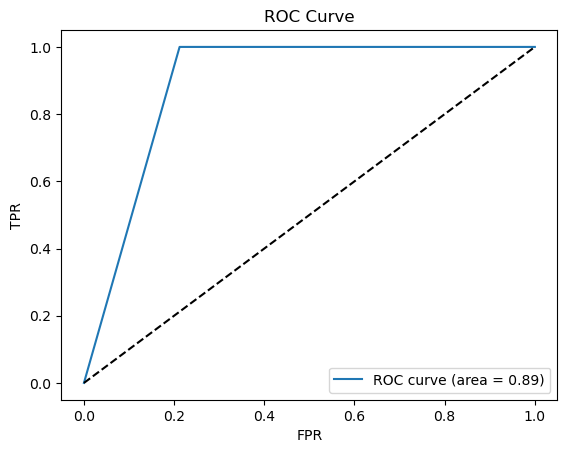

In [295]:
y_pred = randomforest_clf.predict(X_test)
y_true = y_test  

randomforest_acc = accuracy_score(y_true, y_pred)
print(f'Accuracy: {randomforest_acc}')


randomforest_f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {randomforest_f1}")


randomforest_fbeta = fbeta_score(y_true, y_pred, beta=2)
print(f"F-beta Score: {randomforest_fbeta}")

randomforest_precision = precision_score(y_true, y_pred)
print(f"Precision: {randomforest_precision}")

conf_matrix = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()


fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

<b>Stablo Odluke</b>

Accuracy: 0.9054054054054054
F1 Score: 0.9195402298850575
F-beta Score: 0.9523809523809523
Precision: 0.8695652173913043
Confusion Matrix: 
[[27  6]
 [ 1 40]]
ROC AUC: 0.8968957871396895


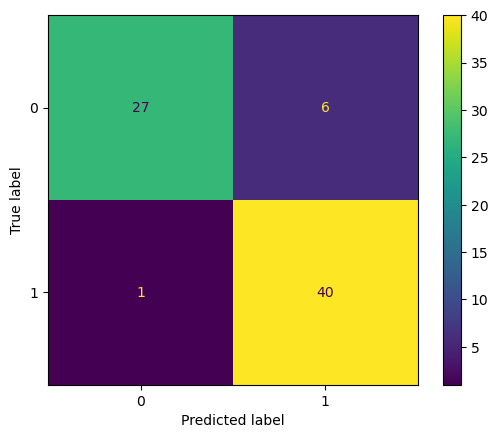

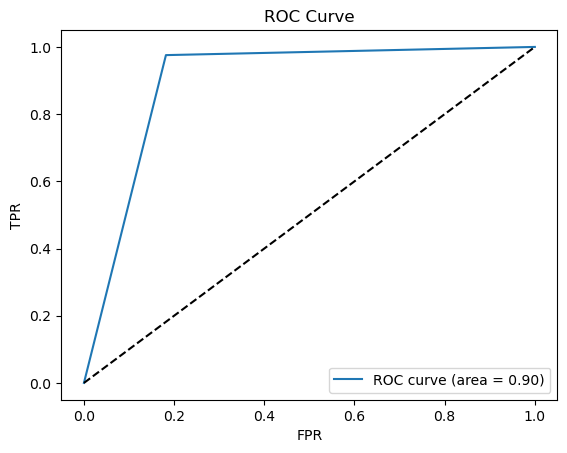

In [296]:
y_pred = decisiontree_clf.predict(X_test)
y_true = y_test  

decisiontree_acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {decisiontree_acc}")


decisiontree_f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {decisiontree_f1}')


decisiontree_fbeta = fbeta_score(y_true, y_pred, beta=2)
print(f"F-beta Score: {decisiontree_fbeta}")

decisiontree_precision = precision_score(y_true, y_pred)
print(f"Precision: {decisiontree_precision}")

conf_matrix = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()


fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

<b>XGBoost</b>

Accuracy: 0.9054054054054054
F1 Score: 0.9213483146067416
F-beta Score: 0.9669811320754718
Precision: 0.8541666666666666
Confusion Matrix: 
[[26  7]
 [ 0 41]]
ROC AUC: 0.8939393939393939


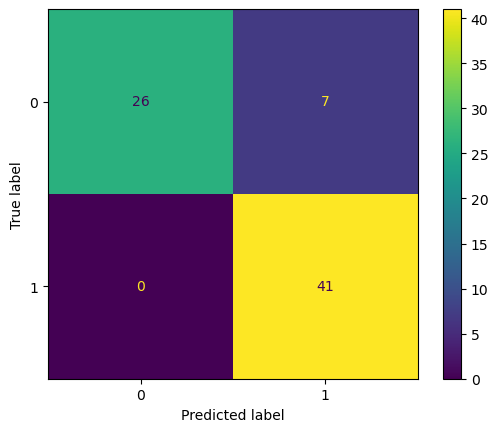

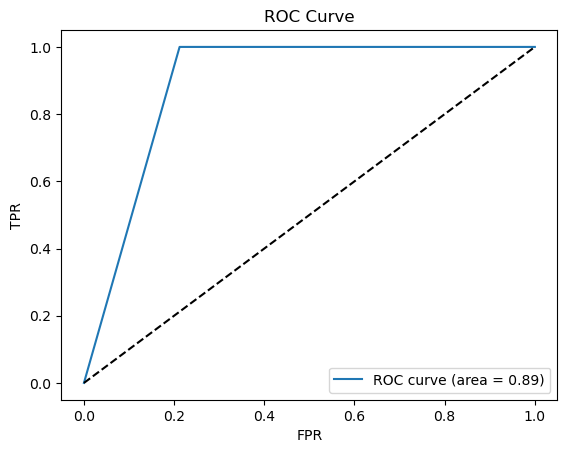

In [297]:
y_pred = xgboost_clf.predict(X_test)
y_true = y_test  # Replace y_test with your true labels

xgboost_acc = accuracy_score(y_true, y_pred)
print(f'Accuracy: {xgboost_acc}')


xgboost_f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {xgboost_f1}')


xgboost_fbeta = fbeta_score(y_true, y_pred, beta=2)
print(f'F-beta Score: {xgboost_fbeta}')

xgboost_precision = precision_score(y_true, y_pred)
print(f"Precision: {xgboost_precision}")

conf_matrix = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()


fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

<b>Usporedba modela</b>

Točnost

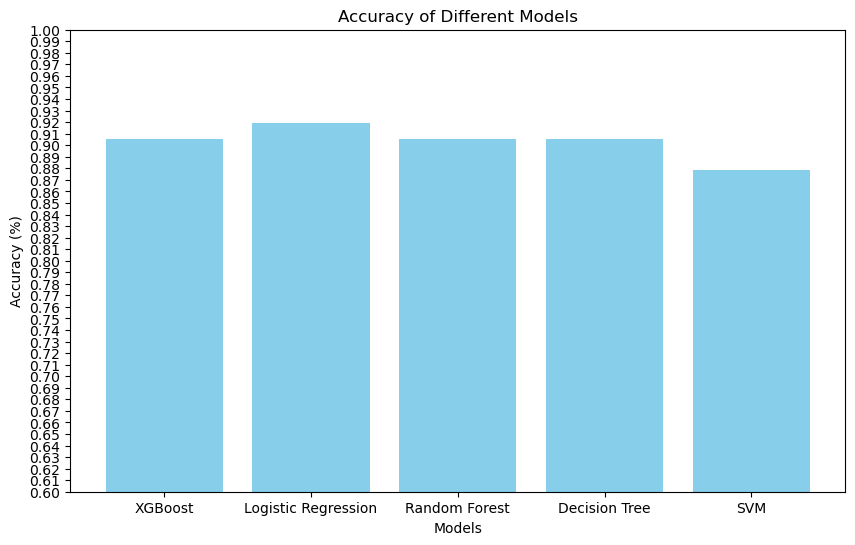

In [298]:
models = ["XGBoost", "Logistic Regression", "Random Forest", "Decision Tree", "SVM"]
accuracies = [xgboost_acc, logreg_acc, randomforest_acc, decisiontree_acc, svm_acc]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color="skyblue")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Different Models")
plt.ylim(0.6, 1)
plt.yticks(np.arange(0.6, 1.01, 0.01))
plt.show()

Preciznost

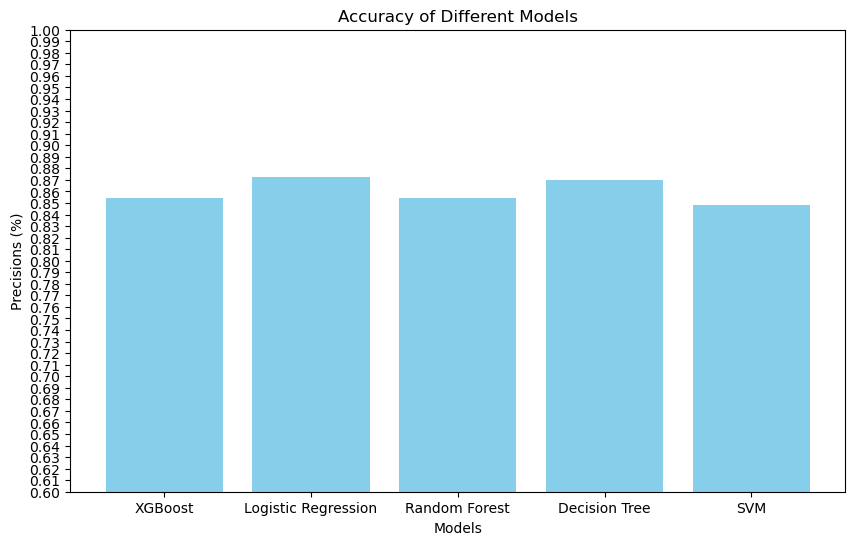

In [299]:
models = ["XGBoost", "Logistic Regression", "Random Forest", "Decision Tree", "SVM"]
precisions = [xgboost_precision, logreg_precision, randomforest_precision, decisiontree_precision, svm_precision]

plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color="skyblue")
plt.xlabel("Models")
plt.ylabel("Precisions (%)")
plt.title("Accuracy of Different Models")
plt.ylim(0.6, 1)
plt.yticks(np.arange(0.6, 1.01, 0.01))
plt.show()